In [1]:
# cnn model
import keras
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

Using TensorFlow backend.


### Read the train & test and preprocessing

In [2]:
#Load the data, split into training/testing groups
d=datasets.load_digits()
X=d.data
Y=d.target

x_train, x_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.3, shuffle= True)
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test
# The known number of output classes.
num_classes = len(np.unique(y_train))
# Input image dimensions
input_shape = (X.shape[1],)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], X.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], X.shape[1],1)

### Creation structure of CNN

In [3]:
# build CNN
def CNN_net():
    model = Sequential()
    
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(X.shape[1]))
    model.add(Activation('relu'))
    
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

In [4]:
# Parametres
verbose, epochs, batch_size = 1, 210, 1750
# initialize the model object
clf_cnn = CNN_net()
# fit network
history = clf_cnn.fit(x_train, y_train_binary, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test_binary))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 1257 samples, validate on 540 samples
Epoch 1/210
1257/1257 [==============================] - 2s 1ms/step - loss: 3.4881 - accuracy: 0.1018 - val_loss: 2.2874 - val_accuracy: 0.1241
Epoch 2/210
1257/1257 [==============================] - 1s 472us/step - loss: 2.9606 - accuracy: 0.0947 - val_loss: 2.2680 - val_accuracy: 0.1222
Epoch 3/210
1257/1257 [==============================] - 1s 417us/step - loss: 2.6707 - accuracy: 0.0994 - val_loss: 2.2639 - val_accuracy: 0.1426
Epoch 4/210
1257/1257 [==============================] - 1s 413us/step - loss: 2.5051 - accuracy: 0.1050 - val_loss: 2.2711 - val_accuracy: 0.1630
Epoch 5/210
1257/1257 [==============================] - 1s 433us/step - loss: 2.3917 - accuracy: 0.1122 - val_loss: 2.2814 - val_accuracy: 0.1722
Epoch 6/210
1257/1257 [==============================] - 1s 431us/step - loss: 2.3303 - accuracy: 0.1169 - val_loss: 2.2919 - val_accurac

Epoch 51/210
1257/1257 [==============================] - 0s 344us/step - loss: 1.5524 - accuracy: 0.4487 - val_loss: 1.0294 - val_accuracy: 0.8074
Epoch 52/210
1257/1257 [==============================] - 0s 363us/step - loss: 1.4921 - accuracy: 0.4956 - val_loss: 0.9716 - val_accuracy: 0.8185
Epoch 53/210
1257/1257 [==============================] - 0s 342us/step - loss: 1.4689 - accuracy: 0.4821 - val_loss: 0.9165 - val_accuracy: 0.8259
Epoch 54/210
1257/1257 [==============================] - 0s 339us/step - loss: 1.4318 - accuracy: 0.5084 - val_loss: 0.8658 - val_accuracy: 0.8296
Epoch 55/210
1257/1257 [==============================] - 0s 332us/step - loss: 1.3842 - accuracy: 0.5322 - val_loss: 0.8187 - val_accuracy: 0.8370
Epoch 56/210
1257/1257 [==============================] - 0s 351us/step - loss: 1.3398 - accuracy: 0.5426 - val_loss: 0.7747 - val_accuracy: 0.8370
Epoch 57/210
1257/1257 [==============================] - 0s 347us/step - loss: 1.3276 - accuracy: 0.5322 - val_

Epoch 107/210
1257/1257 [==============================] - 0s 393us/step - loss: 0.4806 - accuracy: 0.8353 - val_loss: 0.1474 - val_accuracy: 0.9593
Epoch 108/210
1257/1257 [==============================] - 0s 388us/step - loss: 0.5174 - accuracy: 0.8393 - val_loss: 0.1459 - val_accuracy: 0.9574
Epoch 109/210
1257/1257 [==============================] - 1s 418us/step - loss: 0.4870 - accuracy: 0.8481 - val_loss: 0.1446 - val_accuracy: 0.9556
Epoch 110/210
1257/1257 [==============================] - 0s 397us/step - loss: 0.4392 - accuracy: 0.8504 - val_loss: 0.1432 - val_accuracy: 0.9537
Epoch 111/210
1257/1257 [==============================] - 0s 375us/step - loss: 0.4644 - accuracy: 0.8536 - val_loss: 0.1420 - val_accuracy: 0.9537
Epoch 112/210
1257/1257 [==============================] - 0s 352us/step - loss: 0.4647 - accuracy: 0.8560 - val_loss: 0.1396 - val_accuracy: 0.9556
Epoch 113/210
1257/1257 [==============================] - 0s 369us/step - loss: 0.4491 - accuracy: 0.8457

Epoch 162/210
1257/1257 [==============================] - 0s 363us/step - loss: 0.3054 - accuracy: 0.8966 - val_loss: 0.0846 - val_accuracy: 0.9741
Epoch 163/210
1257/1257 [==============================] - 0s 371us/step - loss: 0.2952 - accuracy: 0.8958 - val_loss: 0.0836 - val_accuracy: 0.9741
Epoch 164/210
1257/1257 [==============================] - 0s 358us/step - loss: 0.3003 - accuracy: 0.9061 - val_loss: 0.0827 - val_accuracy: 0.9759
Epoch 165/210
1257/1257 [==============================] - 1s 399us/step - loss: 0.2908 - accuracy: 0.9069 - val_loss: 0.0820 - val_accuracy: 0.9759
Epoch 166/210
1257/1257 [==============================] - 0s 360us/step - loss: 0.2589 - accuracy: 0.9181 - val_loss: 0.0812 - val_accuracy: 0.9759
Epoch 167/210
1257/1257 [==============================] - 0s 342us/step - loss: 0.2852 - accuracy: 0.9109 - val_loss: 0.0806 - val_accuracy: 0.9722
Epoch 168/210
1257/1257 [==============================] - 0s 353us/step - loss: 0.2955 - accuracy: 0.9053

In [5]:
# call predict to get predictions Report the accuracy
clf_cnn.evaluate(x_test, y_test_binary)

540/540 [==============================] - 0s 116us/step


[0.06584806663018686, 0.9814814925193787]

In [6]:
# call predict to get predictions
y_pred = clf_cnn.predict(x_test)
y_pred = np.round(y_pred)
from sklearn.metrics import accuracy_score
# Report the accuracy
accuracy_CNN = accuracy_score(y_test_binary, y_pred)
print("CNN : Accuracy: " + str(accuracy_CNN))

CNN : Accuracy: 0.9740740740740741


In [7]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 62, 32)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 60, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 30, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            6208      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 26, 64)            12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 13, 64)           

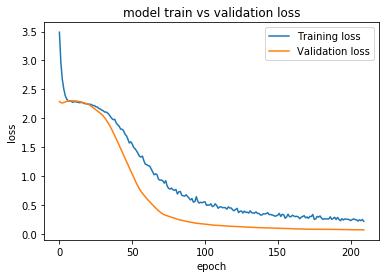

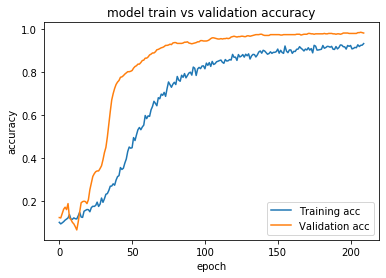

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training acc','Validation acc'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [9]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [10]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [11]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape)

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape)

Training Features (from CNN) Shape: (1257, 64)
Training Labels (from CNN) Shape: (1257,)
Test Features (from CNN) Shape: (540, 64)
Test Labels (from CNN) Shape: (540,)


### Classification by CNN + Random Forest + MLP

In [12]:
from djinn import djinn

print("djinn iris")    
modelname="class_djinn_iris"   # name the model
ntrees=3                 # number of trees = number of neural nets in ensemble
maxdepth=4               # max depth of tree -- optimize this for each data set
dropout_keep=1.0 

#initialize the model
model=djinn.DJINN_Classifier(ntrees,maxdepth,dropout_keep)

x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test 

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
# optimal=model.get_hyperparameters(x_train, y_train, random_state=1)
# batchsize=optimal['batch_size']
# learnrate=optimal['learn_rate']
#epochs=optimal['epochs']
epochs=580
learnrate=0.004
batchsize=63

# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time
# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

import sklearn
#evaluate results
acc=sklearn.metrics.accuracy_score(y_test,m.flatten())  
#close model 
model.close_model()

djinn iris




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Epoch: 0001 cost= 2.311291877 accuracy= 0.230
Epoch: 0002 cost= 2.217436019 accuracy= 0.217
Epoch: 0003 cost= 1.937738229 accuracy= 0.206
Epoch: 0004 cost= 1.745113148 accuracy= 0.318
Epoch: 0005 cost= 1.553093111 accuracy= 0.376
Epoch: 0006 cost= 1.314202568 accuracy= 0.599
Epoch: 0007 cost= 1.094884269 accur

Epoch: 0134 cost= 0.011052110 accuracy= 0.999
Epoch: 0135 cost= 0.010226996 accuracy= 0.997
Epoch: 0136 cost= 0.007809873 accuracy= 0.999
Epoch: 0137 cost= 0.004804355 accuracy= 0.999
Epoch: 0138 cost= 0.007631208 accuracy= 0.999
Epoch: 0139 cost= 0.006648646 accuracy= 0.996
Epoch: 0140 cost= 0.002612055 accuracy= 0.996
Epoch: 0141 cost= 0.009703147 accuracy= 0.993
Epoch: 0142 cost= 0.004414251 accuracy= 0.998
Epoch: 0143 cost= 0.006496818 accuracy= 0.998
Epoch: 0144 cost= 0.004296198 accuracy= 0.999
Epoch: 0145 cost= 0.011147335 accuracy= 0.998
Epoch: 0146 cost= 0.025761138 accuracy= 0.977
Epoch: 0147 cost= 0.034474484 accuracy= 0.985
Epoch: 0148 cost= 0.038099997 accuracy= 0.994
Epoch: 0149 cost= 0.051228153 accuracy= 0.988
Epoch: 0150 cost= 0.064533675 accuracy= 0.974
Epoch: 0151 cost= 0.035662121 accuracy= 0.993
Epoch: 0152 cost= 0.044009485 accuracy= 0.973
Epoch: 0153 cost= 0.127612423 accuracy= 0.950
Epoch: 0154 cost= 0.112359513 accuracy= 0.958
Epoch: 0155 cost= 0.066308771 accu

Epoch: 0315 cost= 0.000099734 accuracy= 1.000
Epoch: 0316 cost= 0.000116273 accuracy= 1.000
Epoch: 0317 cost= 0.000088039 accuracy= 1.000
Epoch: 0318 cost= 0.000103091 accuracy= 1.000
Epoch: 0319 cost= 0.000094710 accuracy= 1.000
Epoch: 0320 cost= 0.000104461 accuracy= 1.000
Epoch: 0321 cost= 0.000107214 accuracy= 1.000
Epoch: 0322 cost= 0.000108396 accuracy= 1.000
Epoch: 0323 cost= 0.000095580 accuracy= 1.000
Epoch: 0324 cost= 0.000076381 accuracy= 1.000
Epoch: 0325 cost= 0.000069315 accuracy= 1.000
Epoch: 0326 cost= 0.000066701 accuracy= 1.000
Epoch: 0327 cost= 0.000099358 accuracy= 1.000
Epoch: 0328 cost= 0.000084501 accuracy= 1.000
Epoch: 0329 cost= 0.000051896 accuracy= 1.000
Epoch: 0330 cost= 0.000061296 accuracy= 1.000
Epoch: 0331 cost= 0.000064929 accuracy= 1.000
Epoch: 0332 cost= 0.000047296 accuracy= 1.000
Epoch: 0333 cost= 0.000140677 accuracy= 1.000
Epoch: 0334 cost= 0.000111956 accuracy= 1.000
Epoch: 0335 cost= 0.000111213 accuracy= 1.000
Epoch: 0336 cost= 0.000077719 accu

Epoch: 0497 cost= 0.000010865 accuracy= 1.000
Epoch: 0498 cost= 0.000014266 accuracy= 1.000
Epoch: 0499 cost= 0.000012982 accuracy= 1.000
Epoch: 0500 cost= 0.000009246 accuracy= 1.000
Epoch: 0501 cost= 0.000010837 accuracy= 1.000
Epoch: 0502 cost= 0.000010704 accuracy= 1.000
Epoch: 0503 cost= 0.000016570 accuracy= 1.000
Epoch: 0504 cost= 0.000014153 accuracy= 1.000
Epoch: 0505 cost= 0.000010802 accuracy= 1.000
Epoch: 0506 cost= 0.000012903 accuracy= 1.000
Epoch: 0507 cost= 0.000012858 accuracy= 1.000
Epoch: 0508 cost= 0.000015158 accuracy= 1.000
Epoch: 0509 cost= 0.000013920 accuracy= 1.000
Epoch: 0510 cost= 0.000013442 accuracy= 1.000
Epoch: 0511 cost= 0.000013048 accuracy= 1.000
Epoch: 0512 cost= 0.000011262 accuracy= 1.000
Epoch: 0513 cost= 0.000010252 accuracy= 1.000
Epoch: 0514 cost= 0.000012901 accuracy= 1.000
Epoch: 0515 cost= 0.000010842 accuracy= 1.000
Epoch: 0516 cost= 0.000010361 accuracy= 1.000
Epoch: 0517 cost= 0.000011451 accuracy= 1.000
Epoch: 0518 cost= 0.000011350 accu

Epoch: 0095 cost= 0.046185081 accuracy= 0.977
Epoch: 0096 cost= 0.043500614 accuracy= 0.982
Epoch: 0097 cost= 0.046657428 accuracy= 0.985
Epoch: 0098 cost= 0.033410610 accuracy= 0.990
Epoch: 0099 cost= 0.026493706 accuracy= 0.985
Epoch: 0100 cost= 0.039552045 accuracy= 0.991
Epoch: 0101 cost= 0.037659254 accuracy= 0.986
Epoch: 0102 cost= 0.035862749 accuracy= 0.989
Epoch: 0103 cost= 0.026379148 accuracy= 0.990
Epoch: 0104 cost= 0.020148698 accuracy= 0.982
Epoch: 0105 cost= 0.027367238 accuracy= 0.988
Epoch: 0106 cost= 0.023328721 accuracy= 0.985
Epoch: 0107 cost= 0.068065127 accuracy= 0.989
Epoch: 0108 cost= 0.034704479 accuracy= 0.992
Epoch: 0109 cost= 0.038038484 accuracy= 0.985
Epoch: 0110 cost= 0.039570274 accuracy= 0.991
Epoch: 0111 cost= 0.051098380 accuracy= 0.989
Epoch: 0112 cost= 0.033417154 accuracy= 0.993
Epoch: 0113 cost= 0.018850599 accuracy= 0.993
Epoch: 0114 cost= 0.015941674 accuracy= 0.994
Epoch: 0115 cost= 0.022618770 accuracy= 0.994
Epoch: 0116 cost= 0.028334604 accu

Epoch: 0276 cost= 0.004274534 accuracy= 0.996
Epoch: 0277 cost= 0.009005564 accuracy= 0.999
Epoch: 0278 cost= 0.005026705 accuracy= 1.000
Epoch: 0279 cost= 0.001531266 accuracy= 1.000
Epoch: 0280 cost= 0.001041330 accuracy= 1.000
Epoch: 0281 cost= 0.002808394 accuracy= 1.000
Epoch: 0282 cost= 0.001689326 accuracy= 1.000
Epoch: 0283 cost= 0.001385817 accuracy= 1.000
Epoch: 0284 cost= 0.001297605 accuracy= 1.000
Epoch: 0285 cost= 0.000687234 accuracy= 1.000
Epoch: 0286 cost= 0.001242542 accuracy= 1.000
Epoch: 0287 cost= 0.001452166 accuracy= 1.000
Epoch: 0288 cost= 0.001351907 accuracy= 1.000
Epoch: 0289 cost= 0.001569509 accuracy= 1.000
Epoch: 0290 cost= 0.001876863 accuracy= 1.000
Epoch: 0291 cost= 0.000673138 accuracy= 1.000
Epoch: 0292 cost= 0.000538926 accuracy= 1.000
Epoch: 0293 cost= 0.000962099 accuracy= 1.000
Epoch: 0294 cost= 0.000784821 accuracy= 1.000
Epoch: 0295 cost= 0.000258703 accuracy= 1.000
Epoch: 0296 cost= 0.000563800 accuracy= 1.000
Epoch: 0297 cost= 0.000605371 accu

Epoch: 0456 cost= 0.000045698 accuracy= 1.000
Epoch: 0457 cost= 0.000047372 accuracy= 1.000
Epoch: 0458 cost= 0.000025160 accuracy= 1.000
Epoch: 0459 cost= 0.000035192 accuracy= 1.000
Epoch: 0460 cost= 0.000027872 accuracy= 1.000
Epoch: 0461 cost= 0.000039868 accuracy= 1.000
Epoch: 0462 cost= 0.000030349 accuracy= 1.000
Epoch: 0463 cost= 0.000024871 accuracy= 1.000
Epoch: 0464 cost= 0.000026259 accuracy= 1.000
Epoch: 0465 cost= 0.000023228 accuracy= 1.000
Epoch: 0466 cost= 0.000059070 accuracy= 1.000
Epoch: 0467 cost= 0.000036102 accuracy= 1.000
Epoch: 0468 cost= 0.000034697 accuracy= 1.000
Epoch: 0469 cost= 0.000035551 accuracy= 1.000
Epoch: 0470 cost= 0.000027644 accuracy= 1.000
Epoch: 0471 cost= 0.000038423 accuracy= 1.000
Epoch: 0472 cost= 0.000033276 accuracy= 1.000
Epoch: 0473 cost= 0.000036072 accuracy= 1.000
Epoch: 0474 cost= 0.000021628 accuracy= 1.000
Epoch: 0475 cost= 0.000036454 accuracy= 1.000
Epoch: 0476 cost= 0.000031240 accuracy= 1.000
Epoch: 0477 cost= 0.000025620 accu

Epoch: 0054 cost= 0.081608388 accuracy= 0.968
Epoch: 0055 cost= 0.078158164 accuracy= 0.984
Epoch: 0056 cost= 0.068330782 accuracy= 0.973
Epoch: 0057 cost= 0.095931174 accuracy= 0.982
Epoch: 0058 cost= 0.078282670 accuracy= 0.983
Epoch: 0059 cost= 0.089112095 accuracy= 0.971
Epoch: 0060 cost= 0.066578492 accuracy= 0.983
Epoch: 0061 cost= 0.107669971 accuracy= 0.948
Epoch: 0062 cost= 0.089355421 accuracy= 0.967
Epoch: 0063 cost= 0.094915268 accuracy= 0.969
Epoch: 0064 cost= 0.079318046 accuracy= 0.978
Epoch: 0065 cost= 0.054327146 accuracy= 0.985
Epoch: 0066 cost= 0.056220130 accuracy= 0.987
Epoch: 0067 cost= 0.047481527 accuracy= 0.989
Epoch: 0068 cost= 0.089276662 accuracy= 0.978
Epoch: 0069 cost= 0.071698944 accuracy= 0.980
Epoch: 0070 cost= 0.054029373 accuracy= 0.972
Epoch: 0071 cost= 0.119288356 accuracy= 0.958
Epoch: 0072 cost= 0.070068285 accuracy= 0.981
Epoch: 0073 cost= 0.049130113 accuracy= 0.984
Epoch: 0074 cost= 0.054424460 accuracy= 0.991
Epoch: 0075 cost= 0.036302267 accu

Epoch: 0234 cost= 0.000342105 accuracy= 1.000
Epoch: 0235 cost= 0.000421397 accuracy= 1.000
Epoch: 0236 cost= 0.000390982 accuracy= 1.000
Epoch: 0237 cost= 0.000312842 accuracy= 1.000
Epoch: 0238 cost= 0.000394224 accuracy= 1.000
Epoch: 0239 cost= 0.000317599 accuracy= 1.000
Epoch: 0240 cost= 0.000324640 accuracy= 1.000
Epoch: 0241 cost= 0.000296073 accuracy= 1.000
Epoch: 0242 cost= 0.000378017 accuracy= 1.000
Epoch: 0243 cost= 0.000371972 accuracy= 1.000
Epoch: 0244 cost= 0.000275595 accuracy= 1.000
Epoch: 0245 cost= 0.000354595 accuracy= 1.000
Epoch: 0246 cost= 0.000306131 accuracy= 1.000
Epoch: 0247 cost= 0.000272498 accuracy= 1.000
Epoch: 0248 cost= 0.000274026 accuracy= 1.000
Epoch: 0249 cost= 0.000273204 accuracy= 1.000
Epoch: 0250 cost= 0.000263534 accuracy= 1.000
Epoch: 0251 cost= 0.000243992 accuracy= 1.000
Epoch: 0252 cost= 0.000214107 accuracy= 1.000
Epoch: 0253 cost= 0.000225831 accuracy= 1.000
Epoch: 0254 cost= 0.000201383 accuracy= 1.000
Epoch: 0255 cost= 0.000231809 accu

Epoch: 0415 cost= 0.000038964 accuracy= 1.000
Epoch: 0416 cost= 0.000039487 accuracy= 1.000
Epoch: 0417 cost= 0.000041936 accuracy= 1.000
Epoch: 0418 cost= 0.000030721 accuracy= 1.000
Epoch: 0419 cost= 0.000039175 accuracy= 1.000
Epoch: 0420 cost= 0.000034530 accuracy= 1.000
Epoch: 0421 cost= 0.000036961 accuracy= 1.000
Epoch: 0422 cost= 0.000034304 accuracy= 1.000
Epoch: 0423 cost= 0.000027135 accuracy= 1.000
Epoch: 0424 cost= 0.000033278 accuracy= 1.000
Epoch: 0425 cost= 0.000034572 accuracy= 1.000
Epoch: 0426 cost= 0.000036739 accuracy= 1.000
Epoch: 0427 cost= 0.000033563 accuracy= 1.000
Epoch: 0428 cost= 0.000027117 accuracy= 1.000
Epoch: 0429 cost= 0.000027606 accuracy= 1.000
Epoch: 0430 cost= 0.000031432 accuracy= 1.000
Epoch: 0431 cost= 0.000027846 accuracy= 1.000
Epoch: 0432 cost= 0.000024434 accuracy= 1.000
Epoch: 0433 cost= 0.000029210 accuracy= 1.000
Epoch: 0434 cost= 0.000027195 accuracy= 1.000
Epoch: 0435 cost= 0.000032410 accuracy= 1.000
Epoch: 0436 cost= 0.000036590 accu

### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [13]:
#Feed the extracted features with the labels to RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(out_cnn_train, y_train)
#Feed the features of the test to Random Forest Classifier to predict its class
predictions = rf.predict(out_cnn_test)
accuracy_CNN_RF=accuracy_score(predictions , y_test)
#print('CNN+RF : Accuracy:', accuracy_CNN_RF, '%.')

from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier(n_estimators=100)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictions = Ext.predict(out_cnn_test)
accuracy_CNN_Ext=accuracy_score(predictions , y_test)
#print('CNN+Extrat : Accuracy:', accuracy_CNN_Ext, '%.')


#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(out_cnn_train, y_train)
#print('The accuracy of the SVM classifier on training data is {:.4f}'.format(svm.score(x_train, y_train)))


#Applying XGBoost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(out_cnn_train, y_train)
#print('The accuracy of the XGBoost classifier on training data is {:.4f}'.format(xgb_clf.score(x_train, y_train)))


#Applying Decision Tree
from sklearn import tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier()
#Train DT based on scaled training set
decision_tree.fit(out_cnn_train, y_train)
#Print performance
#print('The accuracy of the Decision Tree classifier on training data is {:.4f}'.format(decision_tree.score(x_train, y_train)))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with the best KNN model
# This will allow us to get a better results
cx_train = np.concatenate((x_train, x_test), 0)
cy_train = np.concatenate((y_train, y_test), 0)

### Classification by RandomForest, ExtraTrees

In [15]:
# RandomForestClassifier : from dataset originl
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
accuracy_RF=accuracy_score(predictions , y_test_)
#print('RF : Accuracy:', accuracy_RF, '%.')

# ExtraTreesClassifier : from dataset originl
Extra = ExtraTreesClassifier(n_estimators=100)
Extra.fit(x_train_, y_train_)
predictions = Extra.predict(x_test_)
accuracy_Extra=accuracy_score(predictions , y_test_)
#print('Extra : Accuracy:', accuracy_Extra, '%.')

###  Score

In [16]:
print('Accuracy RF          ::',  "{:.4f}".format(accuracy_RF),'%.')
print('Accuracy Extrat      ::',  "{:.4f}".format(accuracy_Extra),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN         ::',  "{:.4f}".format(accuracy_CNN), '%.')
print('Accuracy CNN+RF      ::',  "{:.4f}".format(accuracy_CNN_RF), '%.')
print('Accuracy CNN+Extrat  ::',  "{:.4f}".format(accuracy_CNN_Ext), '%.')
print('Accuracy CNN+SVM     :: {:.4f}'.format(svm.score(x_test, y_test)),'%.')
print('Accuracy CNN+XGBoost :: {:.4f}'.format(xgb_clf.score(x_test, y_test)),'%.')
print('Accuracy CNN+DTree   :: {:.4f}'.format(decision_tree.score(x_test, y_test)),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+RF+MLP  ::',  "{:.4f}".format(acc),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+SVM using cv=10     :: {:.4f}' .format(cross_val_score(svm, cx_train, cy_train, cv=10, scoring='accuracy').mean()),'%.')
print('Accuracy CNN+rf  using cv=10     :: {:.4f}' .format(cross_val_score(rf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')
print('Accuracy CNN+XGBoost using cv=10 :: {:.4f}'.format(cross_val_score(xgb_clf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')

Accuracy RF          :: 0.9796 %.
Accuracy Extrat      :: 0.9815 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN         :: 0.9741 %.
Accuracy CNN+RF      :: 0.9759 %.
Accuracy CNN+Extrat  :: 0.9833 %.
Accuracy CNN+SVM     :: 0.2926 %.
Accuracy CNN+XGBoost :: 0.9759 %.
Accuracy CNN+DTree   :: 0.9426 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+RF+MLP  :: 0.9778 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+SVM using cv=10     :: 0.5415 %.
Accuracy CNN+rf  using cv=10     :: 0.9866 %.
Accuracy CNN+XGBoost using cv=10 :: 0.9811 %.


In [17]:
#https://datascience.stackexchange.com/questions/38957/keras-conv1d-for-simple-data-target-prediction